In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from collections import defaultdict
import seaborn as sns
from scipy.stats import f_oneway, norm, shapiro, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests


df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet1.xlsx', sheet_name = "Master")

In [87]:
df

,exp,sample,trt_time,orient,spectra_num,details,details1,752.901,754.044,755.187,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth,Ctrl_20mins_Orth,-0.004580,0.014198,0.033234,...,0.063764,0.060871,0.058869,0.058241,0.058690,0.060554,0.064038,0.069348,0.076688,0.086265
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth,Ctrl_20mins_Orth,-0.002485,0.054030,0.099156,...,0.089793,0.091843,0.094528,0.097768,0.101272,0.104856,0.108352,0.111590,0.114402,0.116619
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth,Ctrl_20mins_Orth,-0.006735,0.049518,0.097465,...,0.305150,0.310110,0.314895,0.319764,0.324469,0.329269,0.334224,0.339393,0.344836,0.350614
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth,Ctrl_20mins_Orth,0.016831,0.032360,0.041923,...,0.140087,0.142750,0.144948,0.146399,0.147567,0.148977,0.150814,0.153261,0.156503,0.160724
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth,Ctrl_20mins_Orth,-0.002913,0.041236,0.079787,...,0.222366,0.224526,0.226351,0.227929,0.229314,0.230770,0.232435,0.234444,0.236937,0.240051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,20250609,Trt,60mins,Para,5,0609-Trt-60mins-Para,Trt_60mins_Para,0.025701,0.019553,0.014295,...,0.153886,0.153877,0.152938,0.150287,0.146837,0.142780,0.138306,0.133605,0.128870,0.124290
874,20250609,Trt,60mins,Para,7,0609-Trt-60mins-Para,Trt_60mins_Para,-0.007358,0.022695,0.046221,...,0.316235,0.309218,0.304731,0.303583,0.304322,0.306906,0.311292,0.317438,0.325301,0.334838
875,20250609,Trt,60mins,Para,9,0609-Trt-60mins-Para,Trt_60mins_Para,0.133186,0.152916,0.159233,...,0.181936,0.182247,0.186264,0.191120,0.198225,0.207921,0.220552,0.236461,0.255989,0.279480
876,20250609,Trt,60mins,Para,11,0609-Trt-60mins-Para,Trt_60mins_Para,0.030676,0.015587,0.007095,...,0.191811,0.196527,0.201630,0.207425,0.213069,0.218280,0.222780,0.226290,0.228528,0.229216


In [88]:
df[(df['trt_time'] == i) & (df['orient'] == j) & (df['sample'] == 'Trt_24h')].groupby(['exp', 'sample', 'trt_time', 'orient']).mean(numeric_only=True).reset_index()

,exp,sample,trt_time,orient,spectra_num,752.901,754.044,755.187,756.329,757.471,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05


In [90]:
df[
                (df['trt_time'] == i) &
                (df['orient'] == j) &
                (df['sample'] != 'Trt_24h')
            ]

,exp,sample,trt_time,orient,spectra_num,details,details1,752.901,754.044,755.187,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
55,20250616,Ctrl,60mins,Para,1,0616-Ctrl-60mins-Para,Ctrl_60mins_Para,0.105827,0.110683,0.114705,...,0.045431,0.044632,0.042536,0.039830,0.036844,0.034026,0.031695,0.030172,0.029776,0.030826
56,20250616,Ctrl,60mins,Para,2,0616-Ctrl-60mins-Para,Ctrl_60mins_Para,0.067356,0.075475,0.082828,...,0.079209,0.078424,0.076999,0.075139,0.072912,0.070588,0.068293,0.066154,0.064298,0.062850
57,20250616,Ctrl,60mins,Para,3,0616-Ctrl-60mins-Para,Ctrl_60mins_Para,-0.001230,0.041524,0.077205,...,0.127349,0.132933,0.138288,0.143295,0.147726,0.151960,0.156023,0.159940,0.163739,0.167444
58,20250616,Ctrl,60mins,Para,4,0616-Ctrl-60mins-Para,Ctrl_60mins_Para,0.002286,0.017429,0.030618,...,0.209652,0.210522,0.210184,0.208942,0.206792,0.204716,0.203137,0.202478,0.203161,0.205611
59,20250616,Ctrl,60mins,Para,5,0616-Ctrl-60mins-Para,Ctrl_60mins_Para,0.230481,0.279279,0.313758,...,0.093621,0.091652,0.090482,0.090228,0.090979,0.092182,0.093684,0.095333,0.096976,0.098460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,20250609,Trt,60mins,Para,5,0609-Trt-60mins-Para,Trt_60mins_Para,0.025701,0.019553,0.014295,...,0.153886,0.153877,0.152938,0.150287,0.146837,0.142780,0.138306,0.133605,0.128870,0.124290
874,20250609,Trt,60mins,Para,7,0609-Trt-60mins-Para,Trt_60mins_Para,-0.007358,0.022695,0.046221,...,0.316235,0.309218,0.304731,0.303583,0.304322,0.306906,0.311292,0.317438,0.325301,0.334838
875,20250609,Trt,60mins,Para,9,0609-Trt-60mins-Para,Trt_60mins_Para,0.133186,0.152916,0.159233,...,0.181936,0.182247,0.186264,0.191120,0.198225,0.207921,0.220552,0.236461,0.255989,0.279480
876,20250609,Trt,60mins,Para,11,0609-Trt-60mins-Para,Trt_60mins_Para,0.030676,0.015587,0.007095,...,0.191811,0.196527,0.201630,0.207425,0.213069,0.218280,0.222780,0.226290,0.228528,0.229216


In [189]:
peaks_sel = []

ctrs_para = [860, 940, 1240, 1270, 1316, 1344, 1631, 1665, 1690]

for i in ['2mins', '20mins', '40mins', '60mins']:
    for j in ['Orth', 'Para']:

        sub = (
            df[
                (df['trt_time'] == i) &
                (df['orient'] == j) &
                (df['sample'] != 'Trt_24h')
            ]
            .groupby(['exp', 'sample', 'trt_time', 'orient', 'spectra_num'])
            .mean(numeric_only=True)
            .reset_index()
        )

        spectral_cols = sub.columns[5:].astype(float)

        for b in range(len(sub)):

            row_dict = {
                'exp': sub.iloc[b]['exp'],
                'sample': sub.iloc[b]['sample'],
                'trt_time': i,
                'orient': j,
                'spectra_num': sub.iloc[b]['spectra_num'],
            }

            spectrum = sub.iloc[b, 5:].values

            for c in ctrs_para:
                mask = (spectral_cols >= c - 5) & (spectral_cols <= c + 6)

                if not mask.any():
                    row_dict[c] = np.nan
                    continue

                peak_vals = spectrum[mask]
                peak_wls = spectral_cols[mask]

                idx_max = np.argmax(peak_vals)
                row_dict[c] = peak_vals[idx_max]

            peaks_sel.append(row_dict)


In [52]:
peaks_sel = []
for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
    for j in ['Orth', 'Para']:
        sub = df[(df['trt_time'] == i) & (df['orient'] == j) & (df['sample'] != 'Trt_24h')].groupby(['exp', 'sample', 'trt_time', 'orient']).mean(numeric_only=True).reset_index()
        #ctrl = df[(df['sample'] == 'Ctrl') & (df['orient'] == j)]
        #print(sub)

        ctrs_para = [860, 940, 1316,  1344,  1240, 1270,  1631, 1665]
        #1381, 1033, 1062, 1207,1548, 1575, 
        
        for c in ctrs_para:
            for b in range(len(sub)):
                mask = (sub.columns[5:] >= c - 5) & (sub.columns[5:] <= c + 6) 
                loc_idx = sub.columns[5:][mask]
                peak_idx = sub.iloc[b, 5:].values[mask]

                idx_max = np.argmax(peak_idx)
                peak_wl = loc_idx[idx_max]
                int_val = peak_idx[idx_max]

                #print(idx_max, peak_wl, int_val)
                peaks_sel.append(
                    {
                        #'deets': sub.iloc[b, :5],
                        'pk': c,
                        'int': int_val,
                        'trt_time': i,
                        'orient': j,
                        'sample': sub.iloc[b]['sample'],
                        'date': sub.iloc[b]['exp']
                        
                        
                        }
                )

In [190]:
pk_df = pd.DataFrame(peaks_sel)
pk_df.head()

,exp,sample,trt_time,orient,spectra_num,860,940,1240,1270,1316,1344,1631,1665,1690
0,20250429,Ctrl,2mins,Orth,1,1.018602,1.510149,1.112618,0.753706,0.759404,0.730351,0.262375,0.327089,0.173077
1,20250429,Ctrl,2mins,Orth,2,1.029612,1.430458,1.094904,0.746156,0.792936,0.761855,0.287844,0.354601,0.233301
2,20250429,Ctrl,2mins,Orth,3,1.283356,1.855868,1.383049,0.968386,0.815019,0.668928,0.292135,0.412369,0.252334
3,20250429,Ctrl,2mins,Orth,4,1.133212,1.731472,1.240516,0.862816,0.797826,0.613366,0.315700,0.438115,0.282208
4,20250429,Ctrl,2mins,Orth,5,1.072166,1.647672,1.127894,0.837026,0.746959,0.660629,0.217314,0.356321,0.148807


In [191]:
pk_df.insert(13, '860/940', pk_df[860].values/pk_df[940].values)
pk_df.insert(14, '1240/1270', pk_df[1240].values/pk_df[1270].values)
pk_df.insert(15, '1316/1344', pk_df[1316].values/pk_df[1344].values)
pk_df.insert(16, '1631/1665', pk_df[1631].values/pk_df[1665].values)
pk_df.insert(17, '1665/1690', pk_df[1665].values/pk_df[1690].values)

In [192]:
exp_mean = pk_df.groupby(['exp','trt_time', 'orient','sample']).mean(numeric_only=True).reset_index()

In [132]:
exp_mean[(exp_mean['orient']=='Para') & (exp_mean['sample']=='Ctrl')][['1631/1665']].values

array([[0.76595433],
       [0.75957025],
       [0.71595077],
       [0.64052428],
       [0.69071131],
       [0.77515844],
       [0.68220215],
       [0.66623232],
       [0.67381752],
       [0.66906133],
       [0.71075507],
       [0.72401241],
       [0.7210393 ],
       [0.82810534],
       [0.72751197],
       [0.69759623],
       [0.67499414],
       [0.73154158],
       [0.72571409],
       [0.74692478]])

In [ ]:
exp_mean[(exp_mean['orient']=='Para') & (exp_mean['sample']=='Ctrl')]

,exp,trt_time,orient,sample,spectra_num,860,940,1240,1270,1316,1344,1631,1665,860/940,1240/1270,1316/1344,1631/1665
0,20250429,20mins,Orth,Ctrl,3.5,1.088346,1.587780,1.108580,0.817677,0.823362,0.734190,0.315515,0.382657,0.685804,1.356832,1.129797,0.823920
1,20250429,20mins,Orth,Trt,3.5,1.076388,1.543495,1.100981,0.823146,0.814485,0.778192,0.352311,0.413878,0.696993,1.338625,1.048048,0.849872
2,20250429,20mins,Para,Ctrl,3.5,0.981677,1.013169,0.760074,0.703536,0.665728,0.856680,0.429299,0.560309,0.986427,1.074027,0.791641,0.765954
3,20250429,20mins,Para,Trt,3.5,0.963809,0.944016,0.746010,0.711976,0.683898,0.845611,0.435011,0.597894,1.060203,1.046974,0.820717,0.729738
4,20250429,2mins,Orth,Ctrl,3.5,1.098053,1.625297,1.182833,0.835441,0.787818,0.699382,0.274210,0.377313,0.676339,1.417420,1.133468,0.728628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,20250616,40mins,Para,Trt,3.5,0.858433,0.882781,0.703083,0.679206,0.611944,0.889304,0.395575,0.592663,0.968617,1.035386,0.702143,0.668349
76,20250616,60mins,Orth,Ctrl,3.5,1.025198,1.497820,1.050552,0.764243,0.850225,0.835764,0.316193,0.357118,0.685293,1.374579,1.026548,0.879675
77,20250616,60mins,Orth,Trt,3.5,1.088261,1.547425,1.040463,0.773934,0.853970,0.925187,0.358574,0.441917,0.701226,1.355700,0.955148,0.811658
78,20250616,60mins,Para,Ctrl,3.5,0.882721,0.929912,0.692772,0.672338,0.722123,0.951520,0.391310,0.523150,0.949274,1.033002,0.764736,0.746925


C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13288\2506206252.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = '', frameon = False, fontsize = 6, bbox_to_anchor = (1., 1));
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13288\2506206252.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = '', frameon = False, fontsize = 6, bbox_to_anchor = (1., 1));
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13288\2506206252.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = '', frameon = False, fontsize = 6, bbox_to_anchor = (1., 1));
C:\Users\oadeji01\AppData\Lo

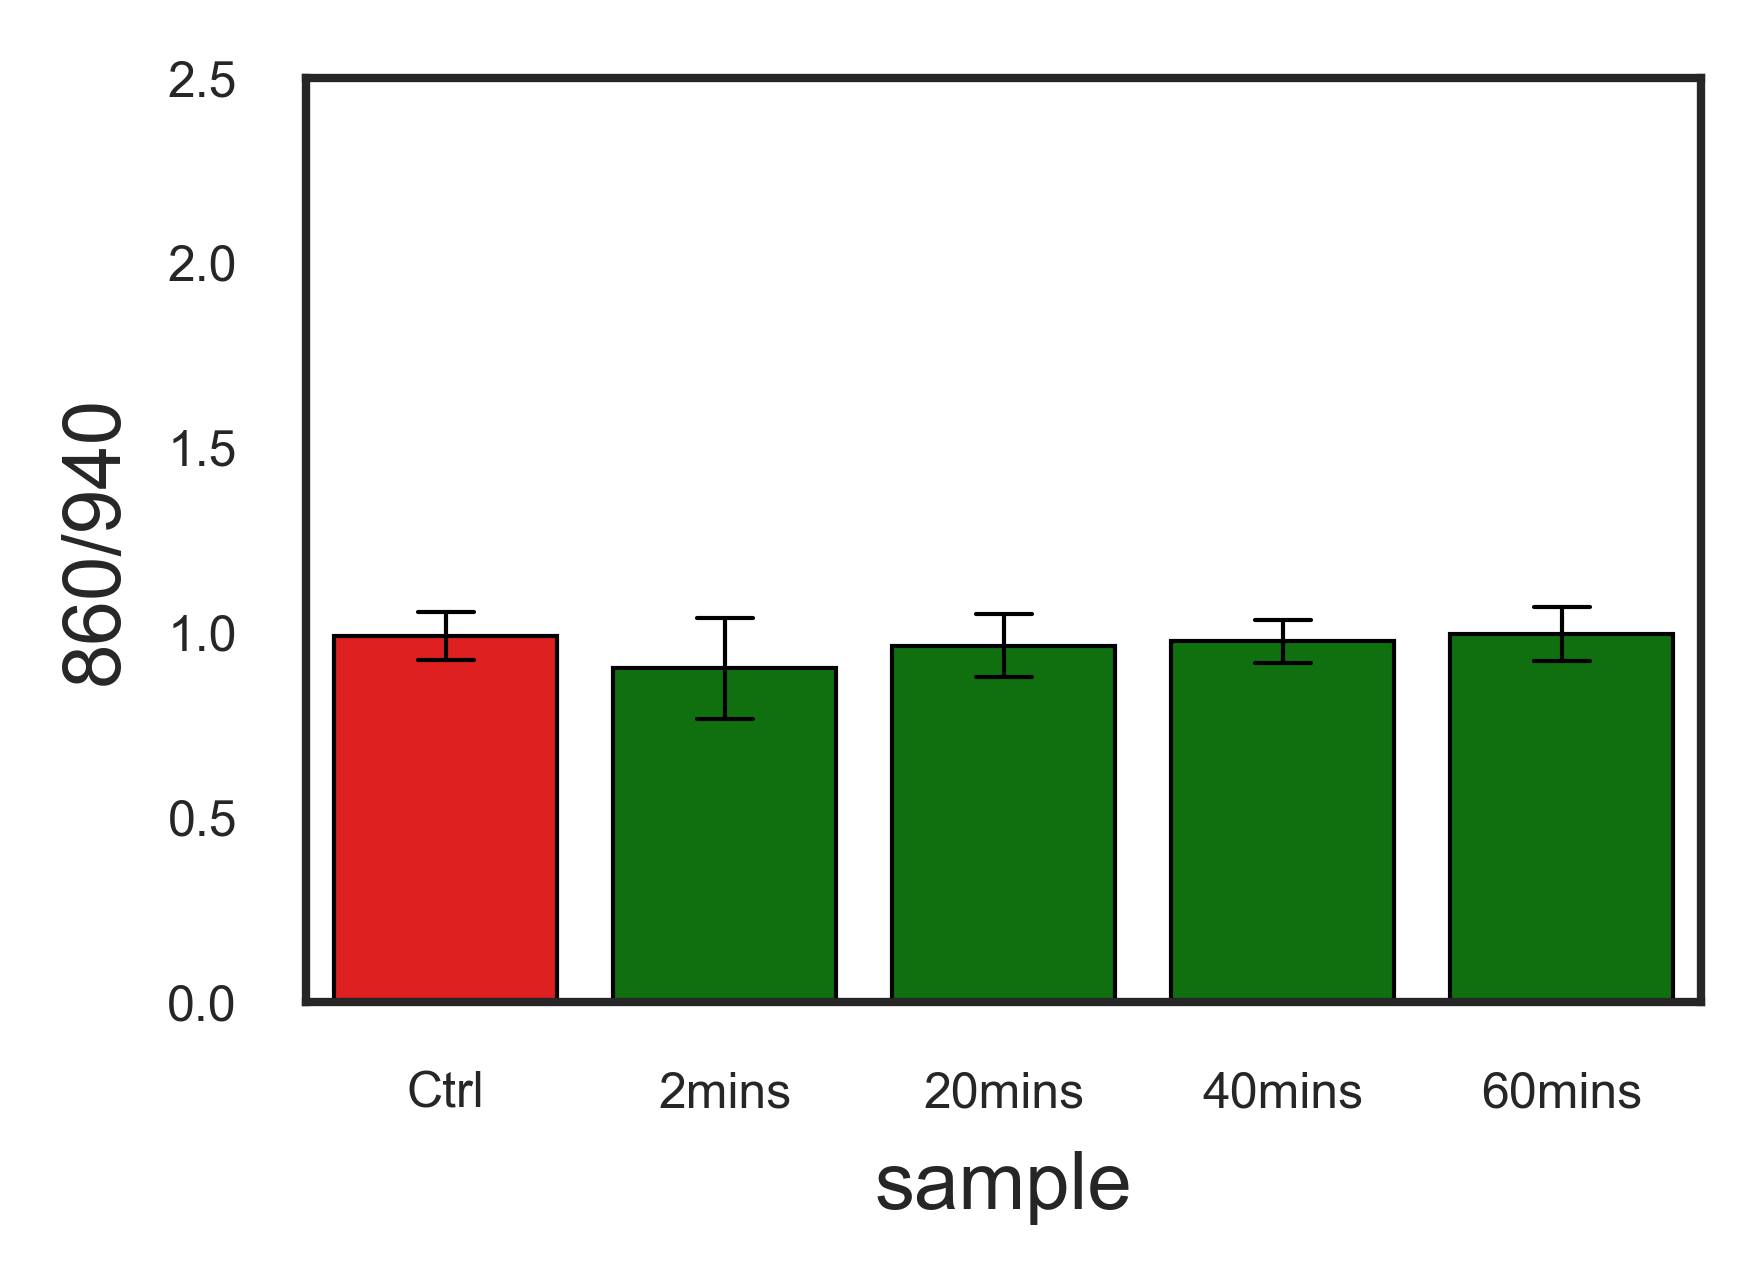

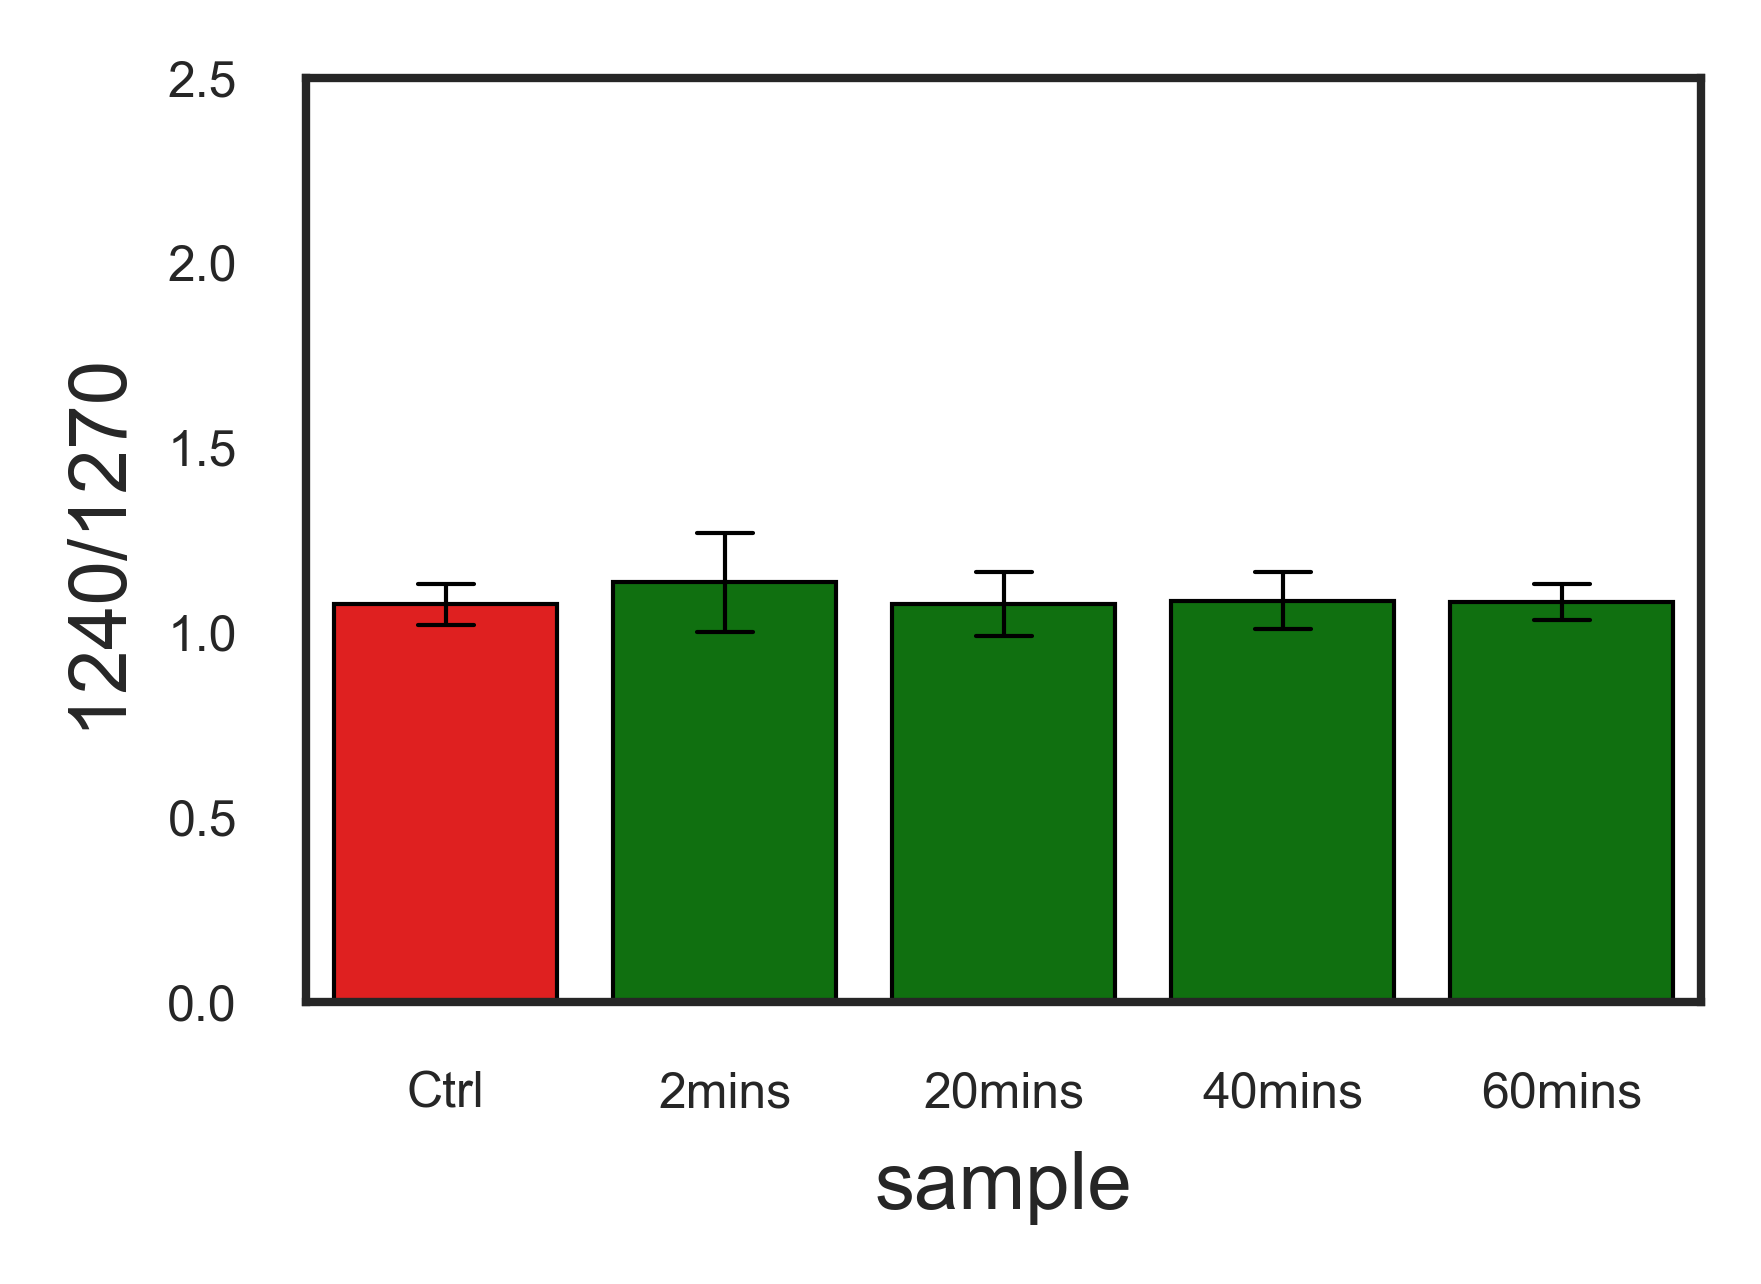

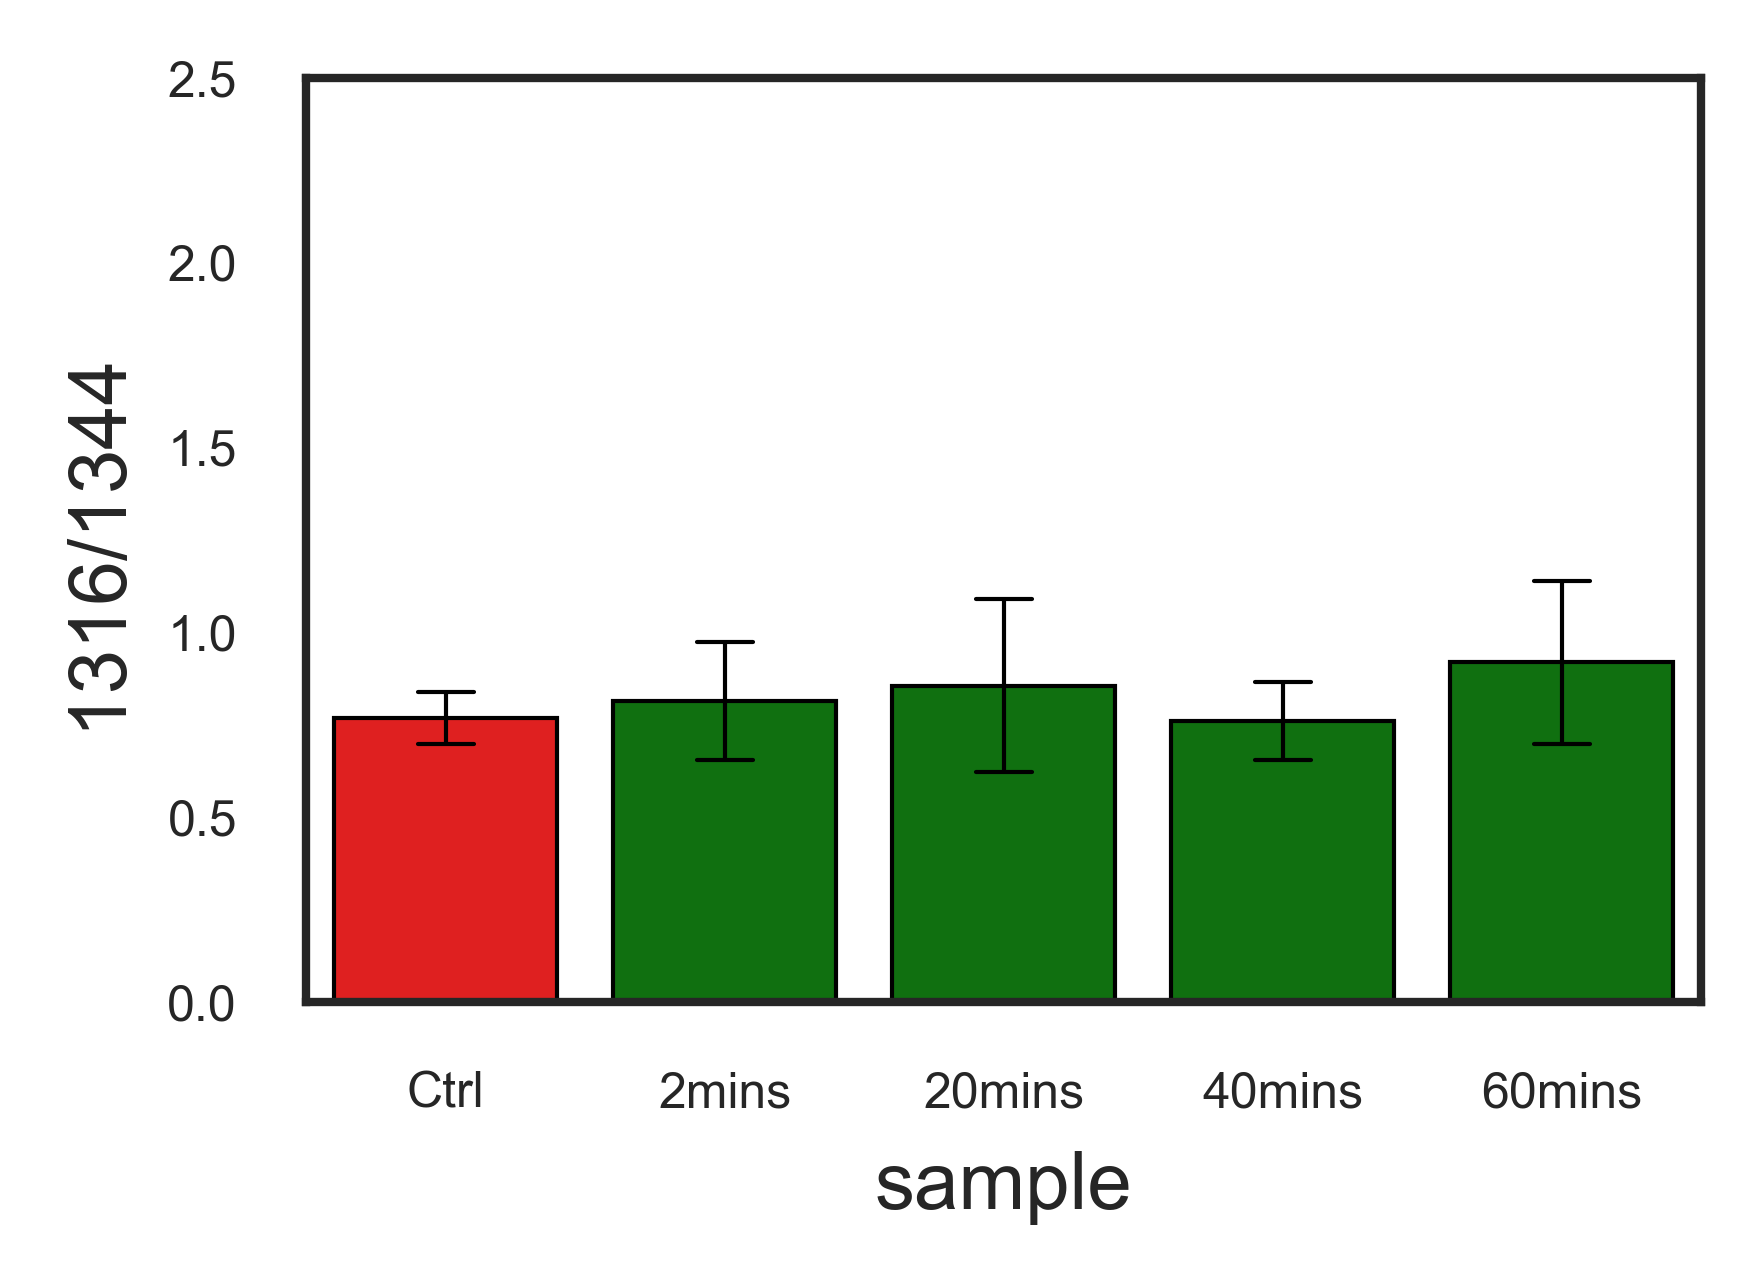

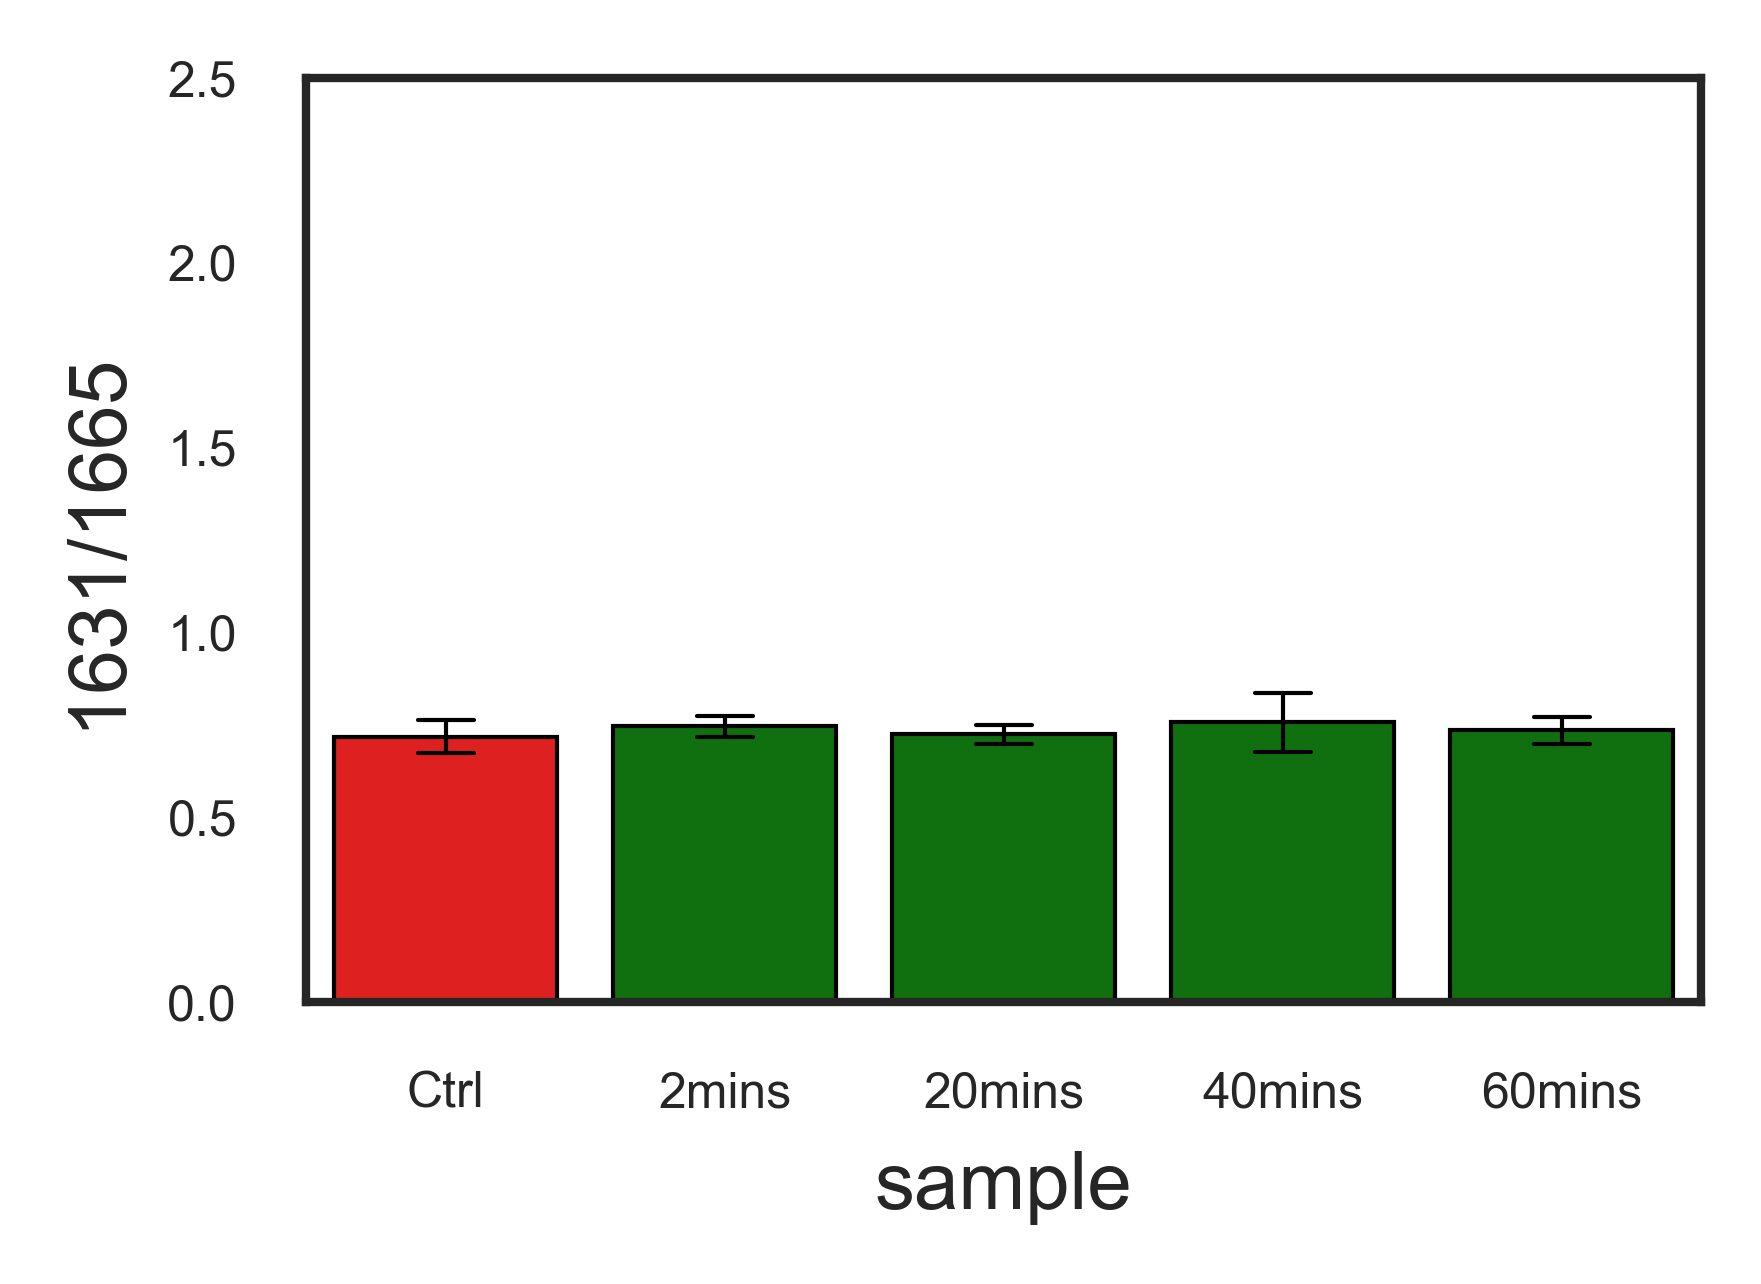

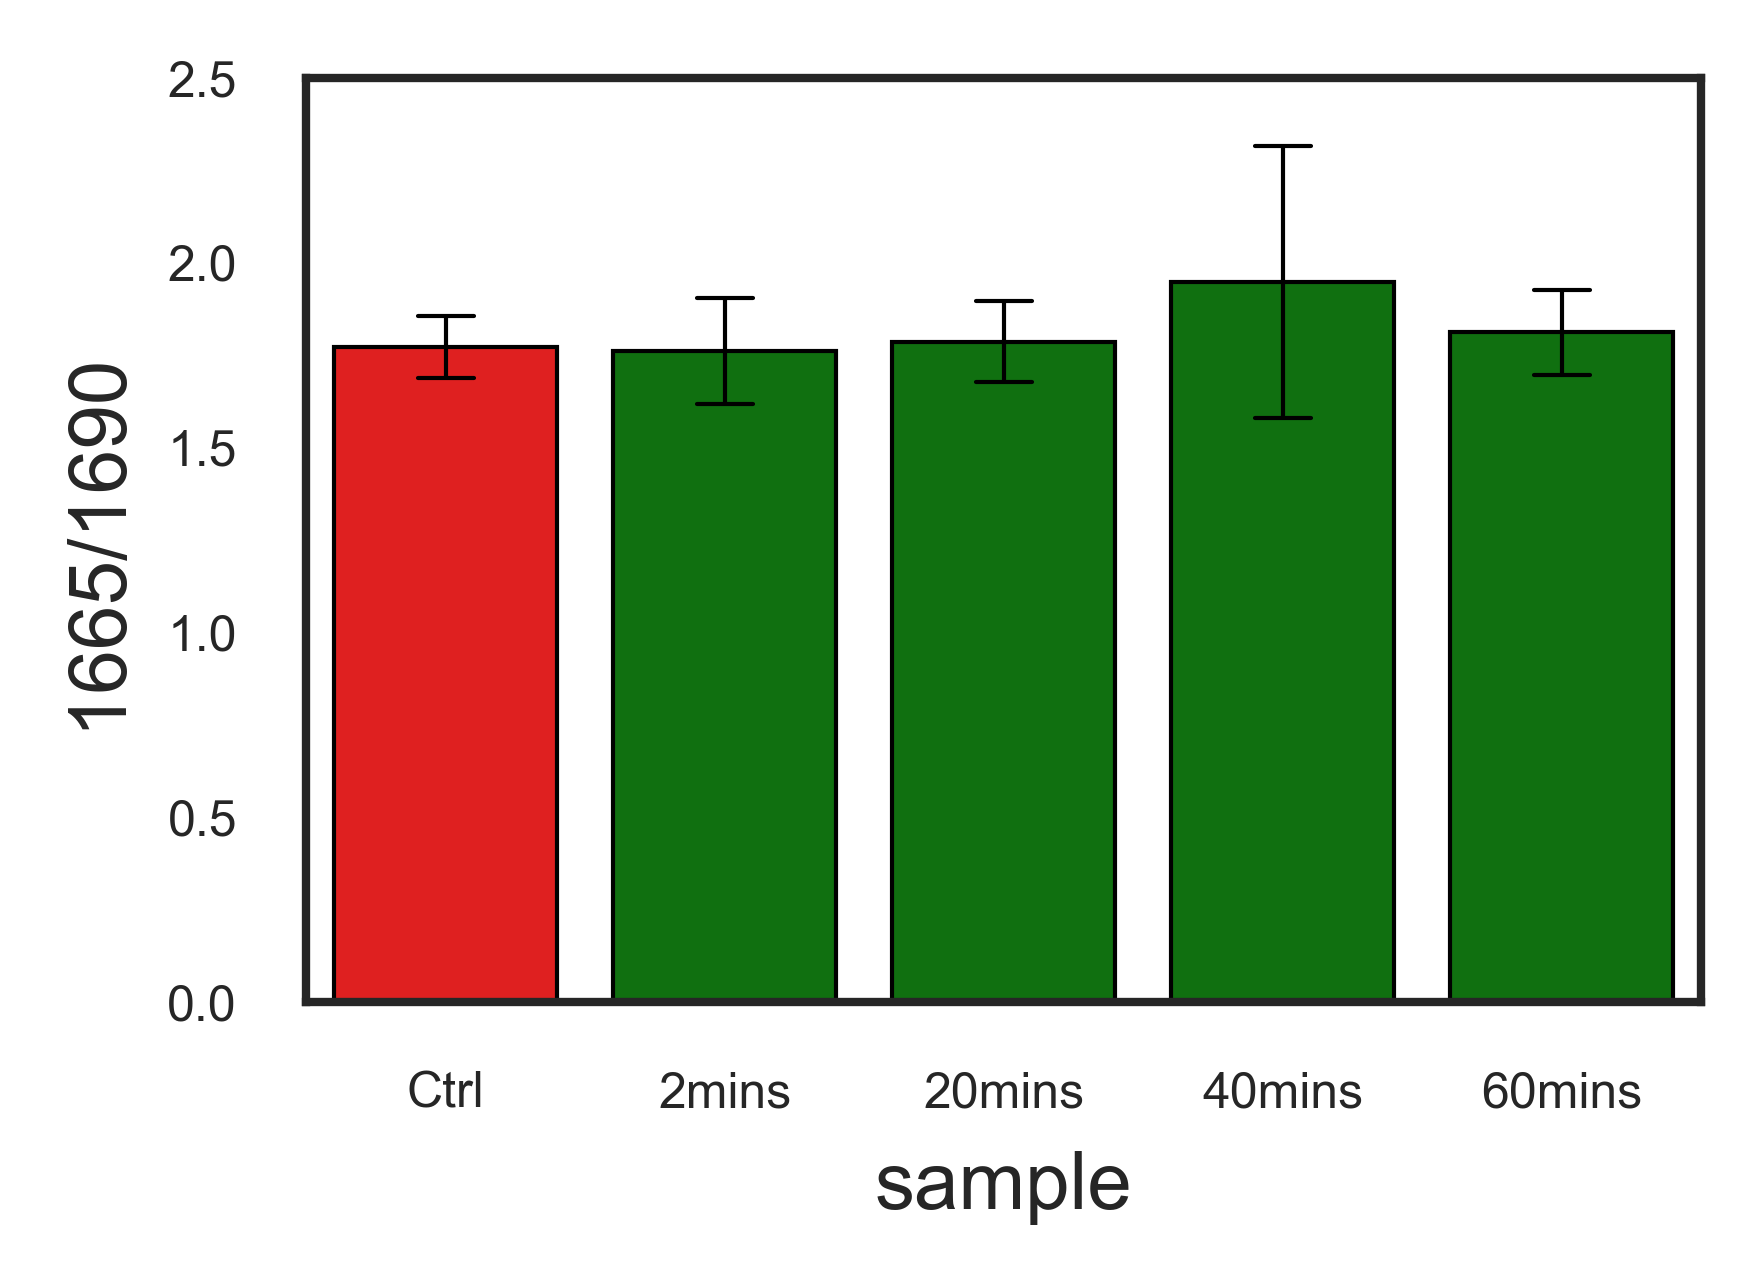

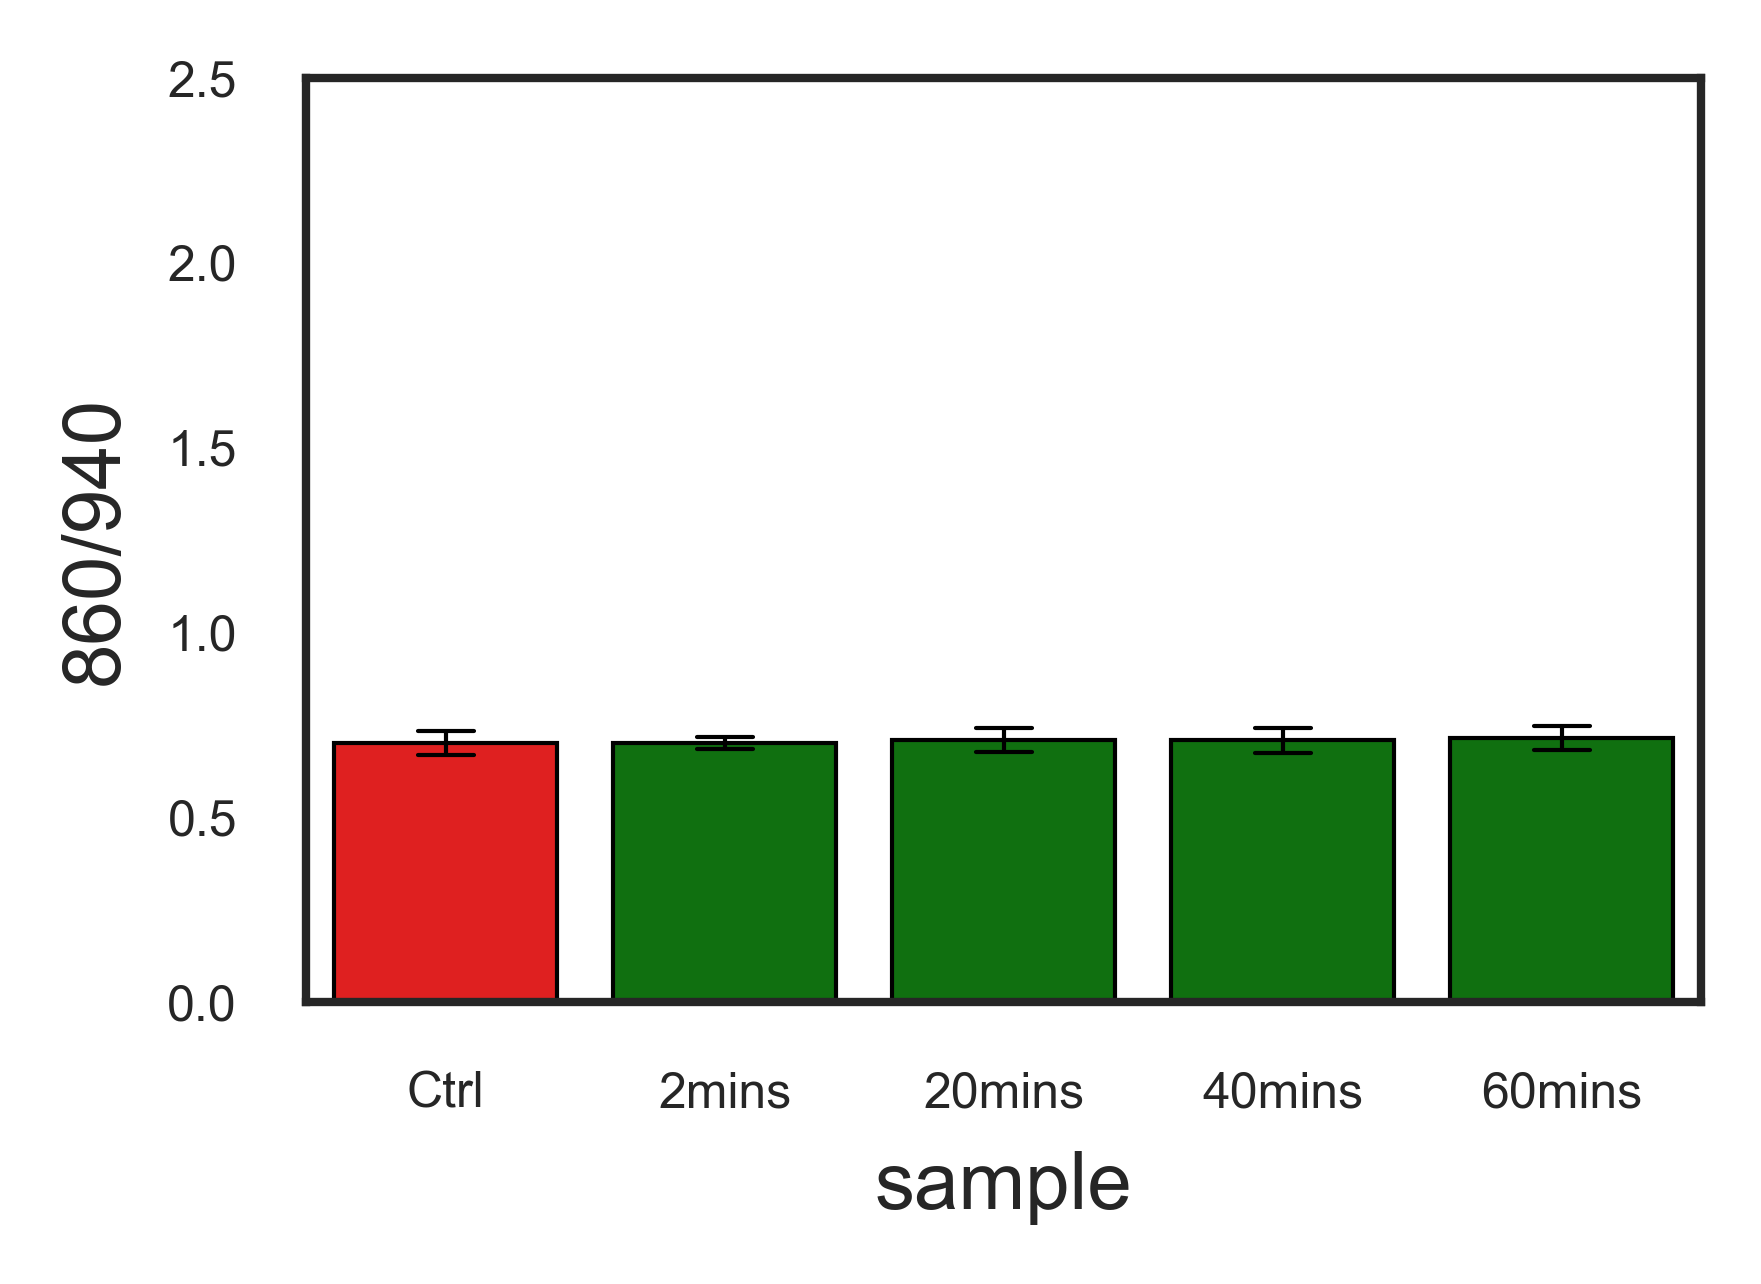

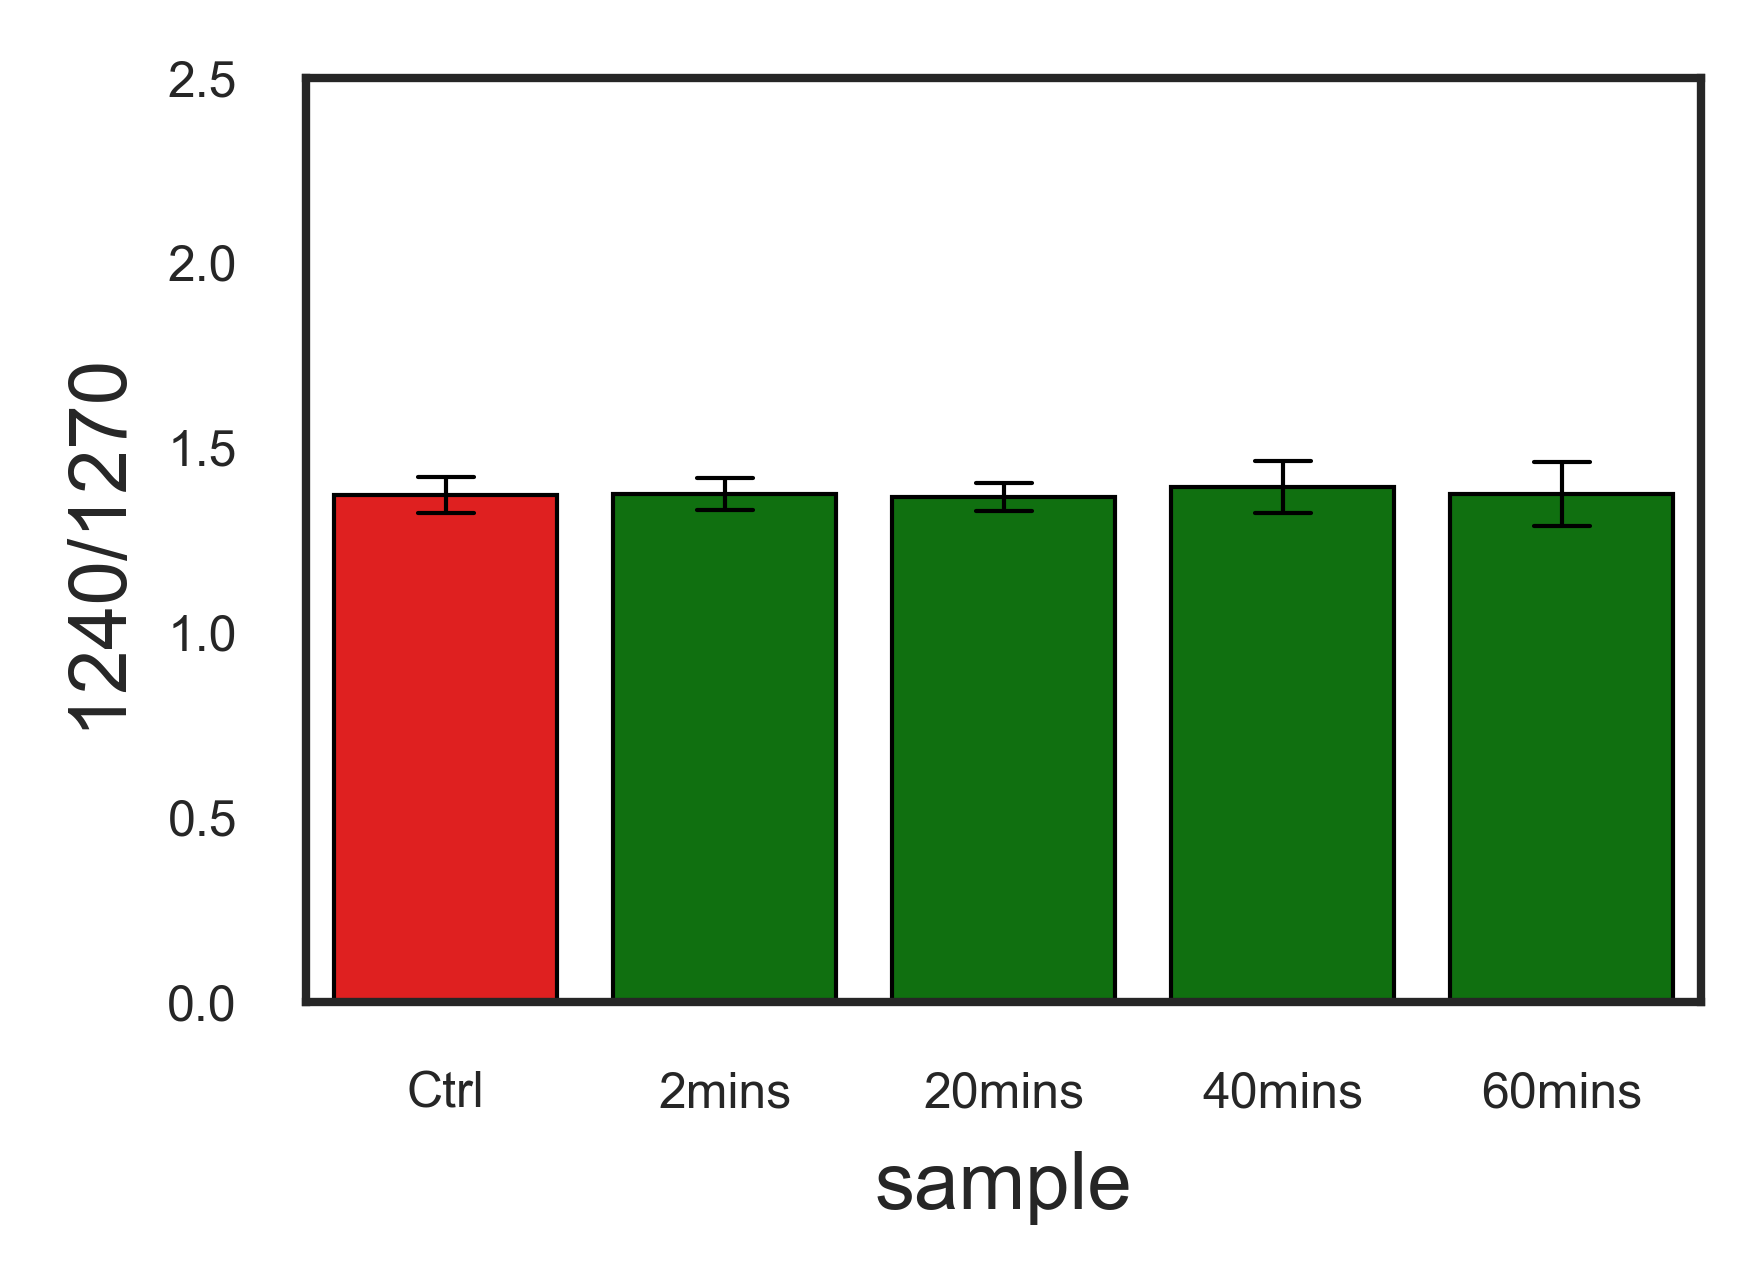

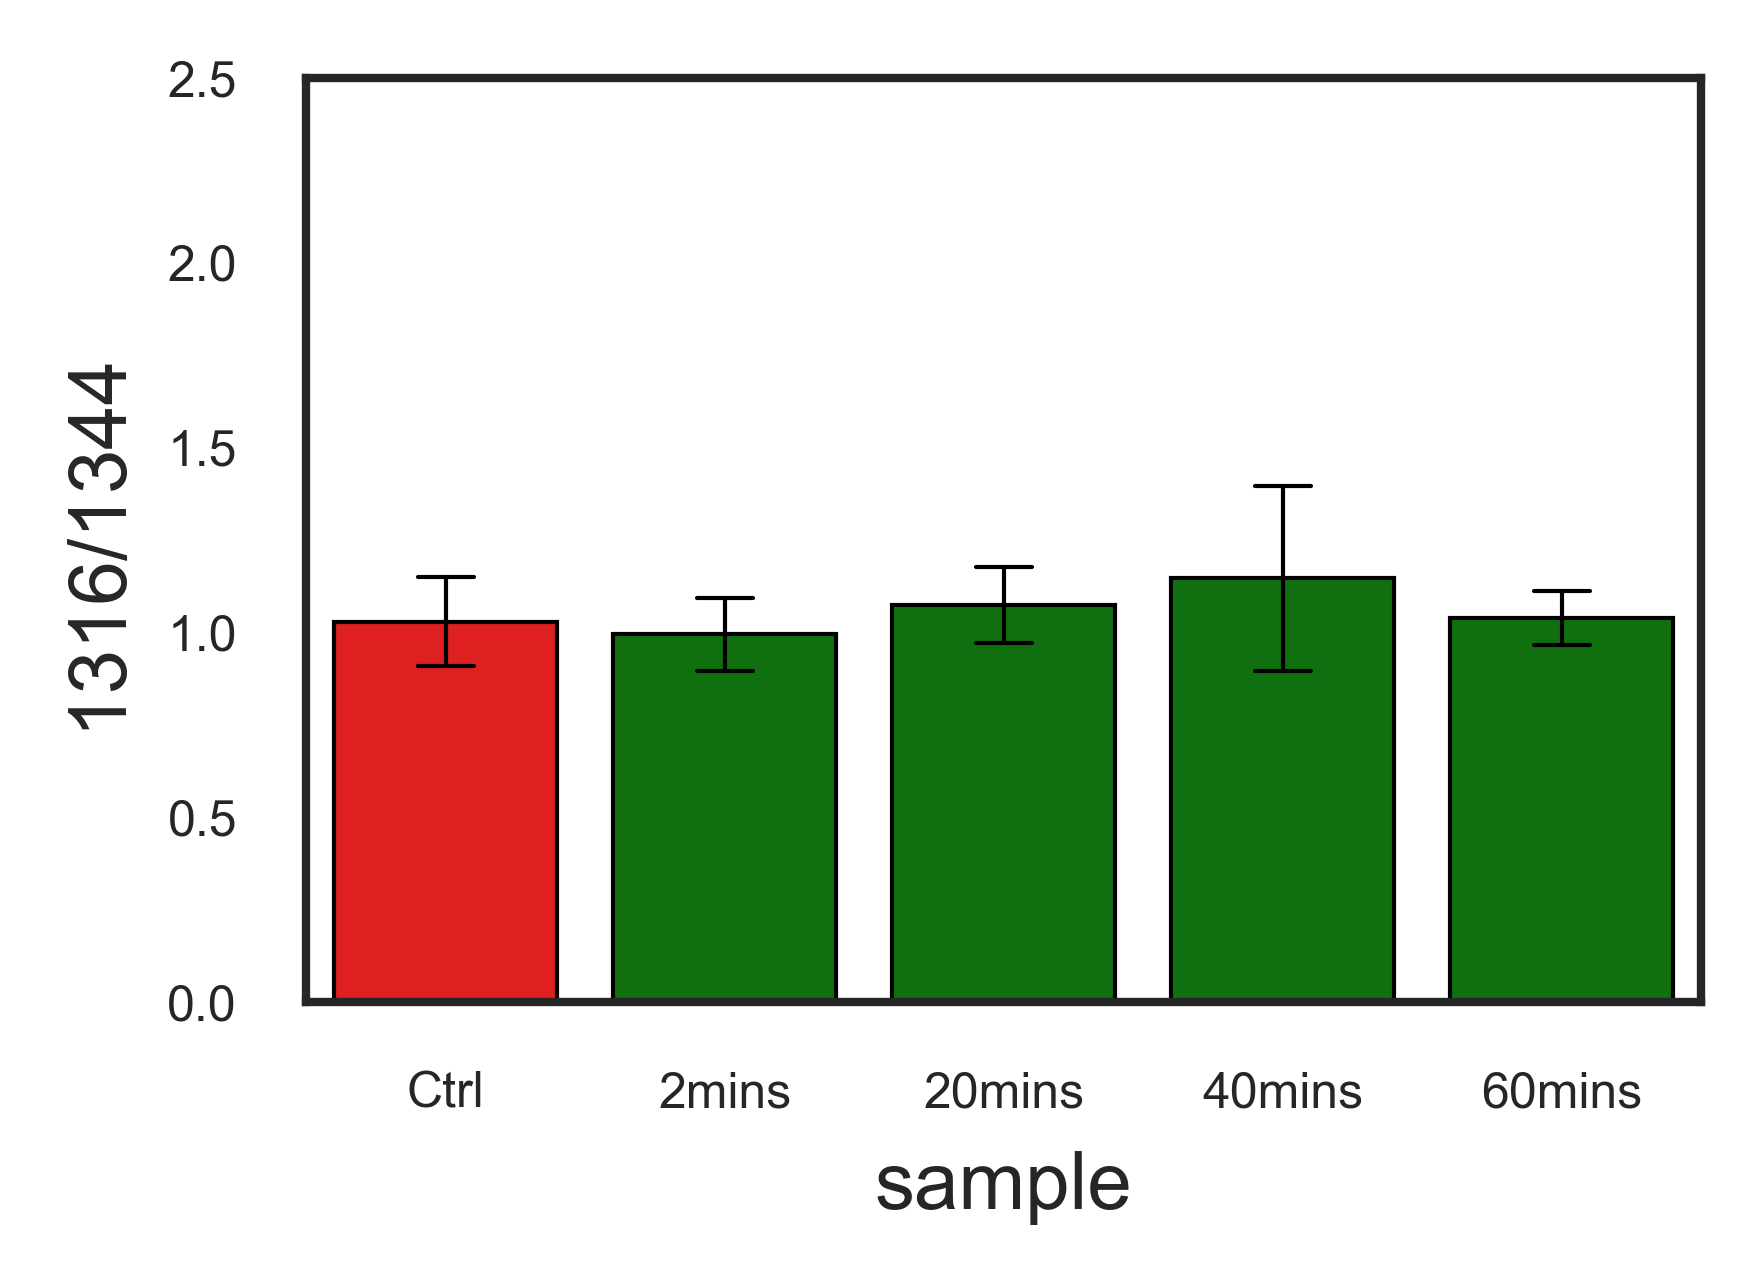

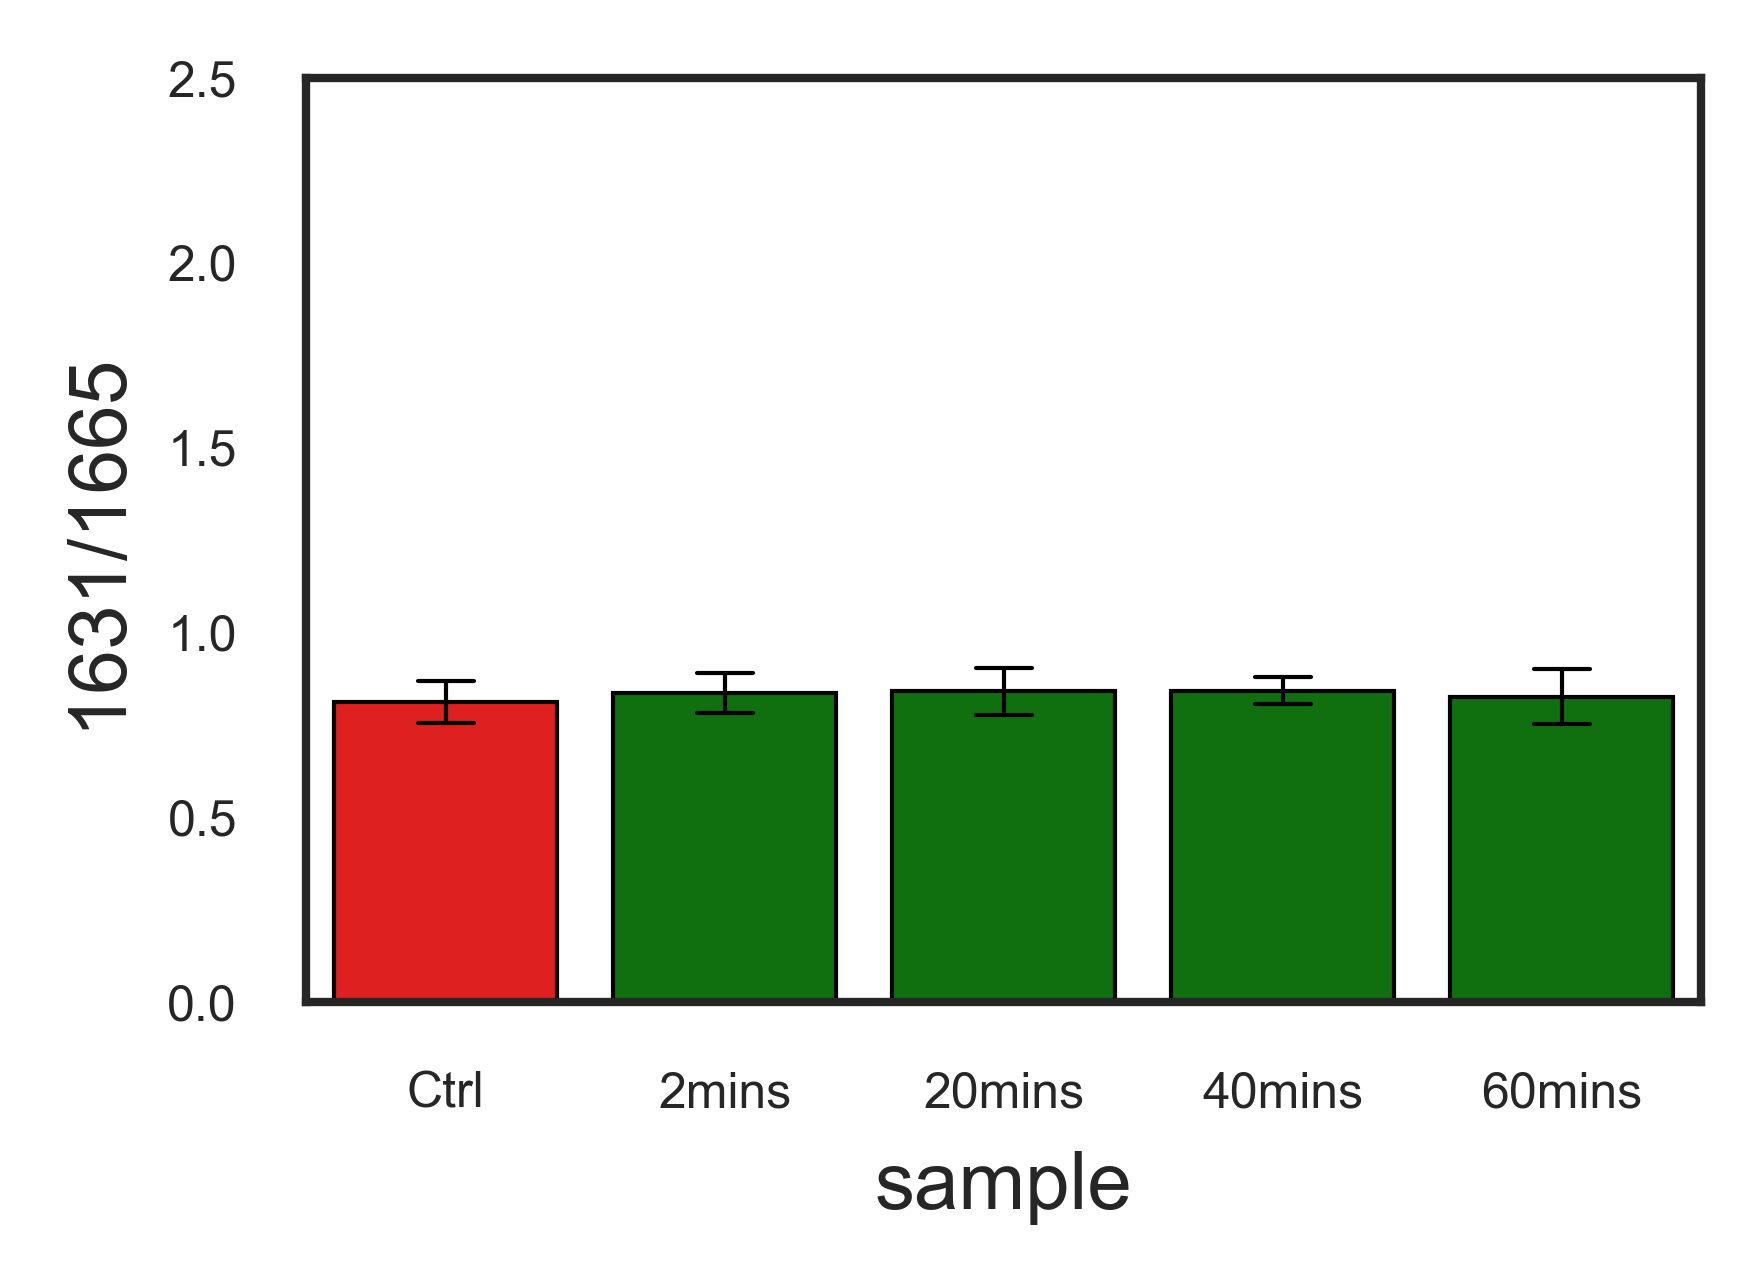

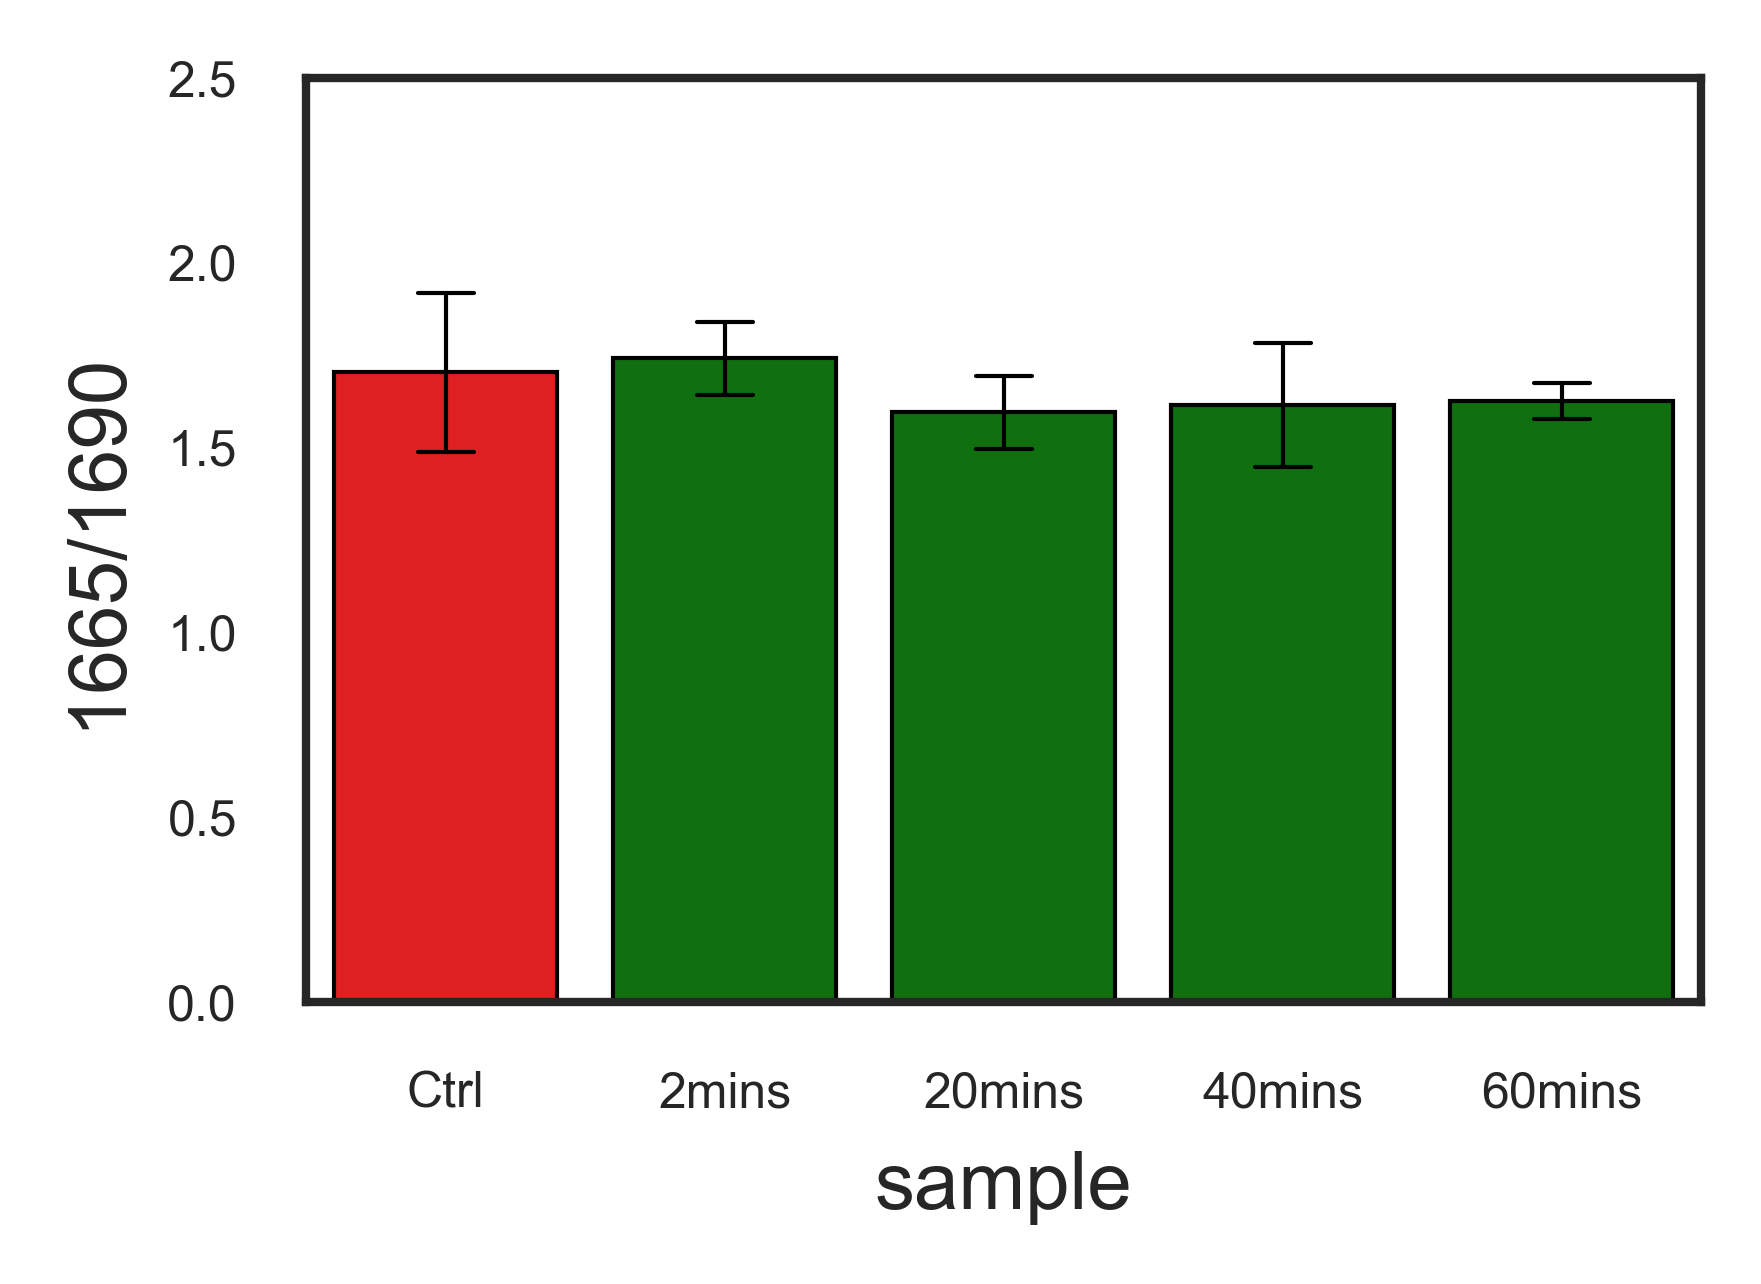

In [196]:
sns.set_theme(context = 'paper', font_scale = 1, style = 'white', rc={"patch.linewidth": 1.0})
for o in ['Para', 'Orth']:
    plot_df = exp_mean[(exp_mean['orient']==o)]
    for rat in ['860/940', '1240/1270', '1316/1344', '1631/1665', '1665/1690']:
        plt.figure(figsize = (3, 2), dpi = 600);
        sns.barplot(
            data = plot_df[plot_df['sample']=='Ctrl'],
                x = 'sample',
                y = rat,
                #hue = 'sample',
                #order = ['2mins', '20mins', '40mins', '60mins'],
                linewidth = .5,
                #legend = False,
                color = 'red',
                errorbar='sd', estimator='mean',
                capsize = .2,
                edgecolor = 'black',
                err_kws={'linewidth': .5, 'color': 'black'}
            );
        sns.barplot(
            data = plot_df[plot_df['sample']=='Trt'],
                x = 'trt_time',
                y = rat,
                #hue = 'sample',
                order = ['2mins', '20mins', '40mins', '60mins'],
                linewidth = .5,
                #legend = False,
                color = 'green',
                errorbar='sd', estimator='mean',
                capsize = .2,
                edgecolor = 'black',
                err_kws={'linewidth': .5, 'color': 'black'}
            );
        plt.legend(title = '', frameon = False, fontsize = 6, bbox_to_anchor = (1., 1));
        plt.ylim(0, 2.5);
        plt.xticks(fontsize = 6);
        plt.yticks(fontsize = 6);

In [ ]:
exp_mean[(exp_mean['orient']==o) & (exp_mean['sample']=='Trt') & (exp_mean['trt_time']=='2mins')][[rat]]

,1631/1665


In [177]:
exp_mean[(exp_mean['orient']==o) & (exp_mean['sample']=='Ctrl')]['860/940']

0     0.685804
4     0.676339
8     0.718614
12    0.718573
16    0.661006
20    0.727940
24    0.719165
28    0.680346
32    0.668974
36    0.755706
40    0.685417
44    0.737331
48    0.675199
52    0.681370
56    0.696552
60    0.634650
64    0.748028
68    0.750904
72    0.697292
76    0.685293
Name: 860/940, dtype: float64

In [198]:
pvals = []
stats = []
for rat in ['860/940', '1240/1270', '1316/1344', '1631/1665']:
    for o in ['Para', 'Orth']:
        for x in ['2mins','20mins', '40mins', '60mins']:
            exp_mean_ctrl = exp_mean[(exp_mean['orient']==o) & (exp_mean['sample']=='Ctrl')][rat].values
            exp_mean_trt = exp_mean[(exp_mean['orient']==o) & (exp_mean['sample']=='Trt') & (exp_mean['trt_time']==x)][rat].values

            tstat, p = ttest_ind(exp_mean_ctrl, exp_mean_trt, equal_var=False, alternative='two-sided')
            pvals.append(p)
            stats.append(tstat)

            reject, pvals_corr, _, _ = multipletests(
                p,
                alpha=0.05,
                method='holm-sidak'
                )
            print(rat, o, x)
            print(reject, pvals_corr)
            print('///////////////////////////////////////////////////')

860/940 Para 2mins
[False] [0.22603419]
///////////////////////////////////////////////////
860/940 Para 20mins
[False] [0.55135896]
///////////////////////////////////////////////////
860/940 Para 40mins
[False] [0.65968067]
///////////////////////////////////////////////////
860/940 Para 60mins
[False] [0.85976811]
///////////////////////////////////////////////////
860/940 Orth 2mins
[False] [0.9773428]
///////////////////////////////////////////////////
860/940 Orth 20mins
[False] [0.66558668]
///////////////////////////////////////////////////
860/940 Orth 40mins
[False] [0.72193887]
///////////////////////////////////////////////////
860/940 Orth 60mins
[False] [0.43366893]
///////////////////////////////////////////////////
1240/1270 Para 2mins
[False] [0.37987861]
///////////////////////////////////////////////////
1240/1270 Para 20mins
[False] [0.99391375]
///////////////////////////////////////////////////
1240/1270 Para 40mins
[False] [0.8012214]
////////////////////////////

In [188]:
reject, pvals_corr, _, _ = multipletests(
    pvals,
    alpha=0.05,
    method='holm-sidak'
)
'''results = pd.DataFrame({
    'time': ['2mins','20mins', '40mins', '60mins'],
    #'orient': ['Para', 'Orth'],
    't_stat': stats,
    'p_raw': pvals,
    'p_holm_sidak': pvals_corr,
    'significant': reject
})'''

results = pd.DataFrame({
    'time': np.tile(['2mins','20mins', '40mins', '60mins'], 8),
    'ratio': np.tile(['860/940', '1240/1270', '1316/1344', '1631/1665'], 8),
    't_stat': stats,
    'p_raw': pvals,
    'p_holm_sidak': pvals_corr,
    'significant': reject
})

print(results)

      time      ratio    t_stat     p_raw  p_holm_sidak  significant
0    2mins    860/940  1.402793  0.226034      0.999407        False
1   20mins  1240/1270  0.636021  0.551359      1.000000        False
2   40mins  1316/1344  0.460084  0.659681      1.000000        False
3   60mins  1631/1665 -0.184767  0.859768      1.000000        False
4    2mins    860/940  0.028947  0.977343      1.000000        False
5   20mins  1240/1270 -0.453940  0.665587      1.000000        False
6   40mins  1316/1344 -0.372974  0.721939      1.000000        False
7   60mins  1631/1665 -0.837126  0.433669      0.999996        False
8    2mins    860/940 -0.976491  0.379879      0.999996        False
9   20mins  1240/1270  0.008027  0.993914      1.000000        False
10  40mins  1316/1344 -0.265143  0.801221      1.000000        False
11  60mins  1631/1665 -0.229818  0.824859      1.000000        False
12   2mins    860/940 -0.130038  0.900183      1.000000        False
13  20mins  1240/1270  0.235880  0